<a href="https://colab.research.google.com/github/ETA-03/Data-Analysis-with-Python/blob/main/new_Proyek_Analisis_Data_Margareta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data:
- **Nama:Margareta Moeleate Sihombing**
- **Email:mariafountain.2003@gmail.com**
- **ID Dicoding: eta1803**

## Menentukan Pertanyaan Bisnis

- Jam berapa penyewaan sepeda akan ramai?
- Pada suhu berapa penyewaan sepeda akan ramai?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [2]:
df_hour = pd.read_csv('https://raw.githubusercontent.com/ETA-03/Data-Analysis-with-Python/refs/heads/main/data/hour.csv')
df_day = pd.read_csv('https://raw.githubusercontent.com/ETA-03/Data-Analysis-with-Python/refs/heads/main/data/day.csv')



Pada tahap ini sudah berhasil membaca data yang telah di uploada pada github

### Assessing Data

In [3]:
df_hour.isnull()
df_day.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Pada tahap ini terbukti bahwa data yang digunakan sudah bersih, tidak ada nilai null (missing value)

### Cleaning Data

**Menghilangkan kolom yang tidak diperlukan pada df_hour**
<br> Tabel df_hour dipakai untuk menjawab soal nomor 1, sehingga kita hanya membutuhkan kolom hr (jam) dan cnt (jumlah sepeda)

In [4]:
df_hr_selected = df_hour[['cnt', 'hr']]
print(df_hr_selected)

       cnt  hr
0       16   0
1       40   1
2       32   2
3       13   3
4        1   4
...    ...  ..
17374  119  19
17375   89  20
17376   90  21
17377   61  22
17378   49  23

[17379 rows x 2 columns]


**Menghilangkan kolom yang tidak diperlukan pada df_day serta pengelompokan suhu menjadi 3**
- Tabel df_day dipakai untuk menjawab soal nomor 2, sehingga kita hanya membutuhkan kolom temp (suhu) dan cnt (jumlah sepeda)
- Pengelompokan suhu dilakukan untuk mempermudah analisa data, kelompok menjadi tiga yaitu:
<br> > 0.0583 - 0.237
<br> > 0.327 - 0.549
<br> > 0.594 - 0,862

In [5]:
df_day_selected = df_day[['cnt', 'temp']]
df_day_selected['temp_category'] = pd.cut(df_day['temp'], bins=3)
print(df_day_selected)

      cnt      temp    temp_category
0     985  0.344167   (0.327, 0.594]
1     801  0.363478   (0.327, 0.594]
2    1349  0.196364  (0.0583, 0.327]
3    1562  0.200000  (0.0583, 0.327]
4    1600  0.226957  (0.0583, 0.327]
..    ...       ...              ...
726  2114  0.254167  (0.0583, 0.327]
727  3095  0.253333  (0.0583, 0.327]
728  1341  0.253333  (0.0583, 0.327]
729  1796  0.255833  (0.0583, 0.327]
730  2729  0.215833  (0.0583, 0.327]

[731 rows x 3 columns]


<ipython-input-5-3a3cdb0ba30a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_selected['temp_category'] = pd.cut(df_day['temp'], bins=3)


## Exploratory Data Analysis (EDA)

### Pertanyaan 1

In [6]:
df_hr_selected['hr'].corr(df_hr_selected['cnt'])

0.3940714977829431

In [7]:
hourly_counts = df_hr_selected.groupby('hr')['cnt'].sum().reset_index()
busy_hour = hourly_counts.sort_values(by='cnt', ascending=False).head(1)
hour = busy_hour['hr'].values[0]
count = busy_hour['cnt'].values[0]

total_cnt = df_hr_selected['cnt'].sum()
busy_hour_cnt = busy_hour['cnt'].values[0]
busy_hour_percentage = (busy_hour_cnt / total_cnt) * 100

print(f"Jam ramai di penyewaan sepeda adalah pada jam {hour}")
print(f"Dengan presentase peminjaman {busy_hour_percentage:.2f}% dari total peminjaman")

Jam ramai di penyewaan sepeda adalah pada jam 17
Dengan presentase peminjaman 10.23% dari total peminjaman


**Insight**
- Diketahui bahwa korelasi antara jam dengan jumlah sepeda yang disewa adalah 0,394 yang berarti korelasi anatar dua variabel kuat (nilai korelasi postitif)
- Puncak jumlah penyewaan sepeda ada pada jam 17 dengan presentase peminjaman 10,23% dari total semua peminjaman

### Pertanyaan 2

In [ ]:
df_day_selected['temp'].corr(df_day_selected['cnt'])


0.6274940090334918

In [ ]:
# Group data temp dan cnt
temperature_counts = df_day_selected.groupby('temp_category')['cnt'].sum().reset_index()
most_popular_temp = temperature_counts.loc[temperature_counts['cnt'].idxmax()]

print(f"Suhu paling ramai penyewa sepeda {most_popular_temp['temp_category']}")
print(f"Dengan jumlah sepeda yang disewa {most_popular_temp['cnt']}")

Suhu paling ramai penyewa sepeda (0.594, 0.862]
Dengan jumlah sepeda yang disewa 1490045


<ipython-input-73-ace656ffcfb3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_counts = df_day_selected.groupby('temp_category')['cnt'].sum().reset_index()


**Insight:**
- Diketahui korelasi antara suhu dengan jumlah sepeda yang disewa adalah 0,627 yang berarti korelasi antara dua variabel kuar (nilai korelasi positif)
- Penyewaan sepeda menyentuh puncaknya saat suhu antara 0.594 hingga 0.862

## Visualization & Explanatory Analysis

### Pertanyaan 1:

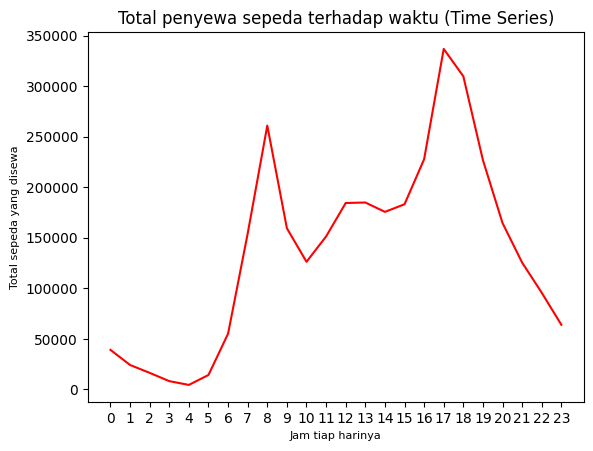

In [ ]:
sns.lineplot(x='hr', y='cnt', data=hourly_counts, color='r')
plt.title('Total penyewa sepeda terhadap waktu (Time Series)', fontsize=12)
plt.xlabel('Jam tiap harinya', fontsize=8)
plt.ylabel('Total sepeda yang disewa', fontsize=8)
plt.xticks(range(0, 24))
plt.show()

**Insight**
<br> Dari visualisasi data yang ditampilkan antara total sepeda dengan jam menenjukan bahwa puncak penyewaan sepeda ada pada jam 17

### Pertanyaan 2:

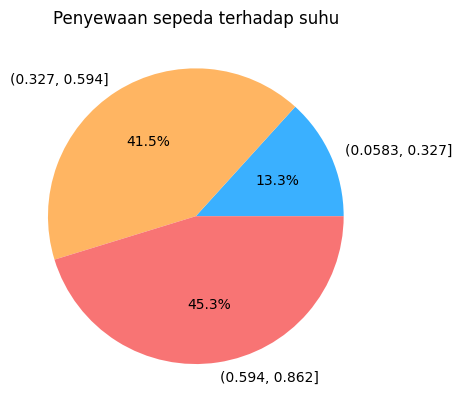

In [ ]:
# Pie chart to show bike rentals by temperature category
color = ('#3AB0FF','#FFB562','#F87474')
plt.pie(temperature_counts['cnt'], labels=temperature_counts['temp_category'], autopct='%1.1f%%', colors=color)
plt.title('Penyewaan sepeda terhadap suhu')
plt.show()

**Insight**
<br> Dari visualisasi data yang ditampilkan dapat dilihat bahwa penyewaan sepeda ramai pada suhu 0,541 - 0,701 dengan presentase 33,4% dari keselurahan penyewaan sepeda

## Analisis Lanjutan (Opsional)

**Label temperatur category**
<br> Label ini memberikan keterangan temperatur dengan 3 label yaitu
- Dingin (0.0583 - 0.327)
- Sedang (0.327 - 0.594)
- Panas (0.594 - 0,862)




In [ ]:
df_day_selected['temp_label'] = pd.cut(df_day_selected['temp'], bins=3, labels=['Dingin', 'Sedang','Panas'])
temperature_label= df_day_selected.groupby('temp_label')['cnt'].sum().reset_index()

<ipython-input-131-6c1e9ba3e5d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_selected['temp_label'] = pd.cut(df_day_selected['temp'], bins=3, labels=['Dingin', 'Sedang','Panas'])
<ipython-input-131-6c1e9ba3e5d9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_label= df_day_selected.groupby('temp_label')['cnt'].sum().reset_index()


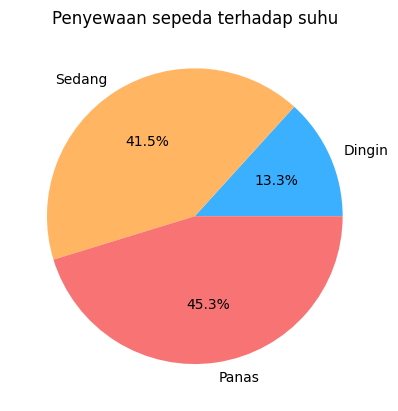

In [ ]:
color = ('#3AB0FF','#FFB562','#F87474')
plt.pie(temperature_label['cnt'], labels=temperature_label['temp_label'], autopct='%1.1f%%', colors=color)
plt.title('Penyewaan sepeda terhadap suhu')
plt.show()

## Conclusion

**Pertanyaan 1**
- Distribusi penyewaan sepeda yang beragam setiap jamnya
- Jam puncak pertama penyewaan sepeda ada pada pukul 8
- Pukul 17 merupakan puncak kedua dan puncak keramaian selama satu hari (bussiest hour)

**Pertanyaan 2**
- Penyewaan sepeda yang berbeda pada tiap pergantian suhu
- Penyewaan sepeda paling banyak terjadi pada kategori suhu panas (antara 0.594-0.862) dengan presentase 45.3%